# Utilisation des arbres de décision pour la discrétisation

La discrétisation avec des arbres de décision consiste à utiliser un arbre de décision pour identifier les cases optimales dans lesquelles trier les valeurs des variables.L'arbre de décision est construit en utilisant la variable à discrétiser et la cible. Lorsqu'un arbre de décision fait une prédiction, il attribue une observation à l'une des N feuilles d'extrémité, par conséquent, tout arbre de décision générera une sortie discrète, dont les valeurs sont les prédictions à chacune de ses N feuilles. La discrétisation avec des arbres de décision crée une relation monotone entre les bacs et la cible. Dans cette recette, nous allons effectuer une discrétisation basée sur un arbre de décision à l'aide de scikit-learn.


Nous utiliserons l'ensemble de données Boston House Prices de scikit-learn. La cible dans cet ensemble de données est continue, par conséquent, nous allons former un arbre de décision pour la régression avecDecisionTreeRegressor() à partir de scikit-learn


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

Chargeons l'ensemble de données Boston House Prices dans une base de données pandas

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [4]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

X_train[['LSTAT', 'lstat_tree']].head(10)

,LSTAT,lstat_tree
141,34.41,12.917241
272,7.73,27.153846
135,16.96,16.361818
298,4.97,32.042857
122,17.93,16.361818
22,18.72,16.361818
68,13.09,20.555000
20,21.02,12.917241
437,26.45,12.917241
14,10.26,20.555000


Si nous créions un arbre de classification, nous utiliserions predict_proba() et conserverions la deuxième colonne du tableau, qui correspond à la probabilité que la cible soit 1 ; par conséquent, nous exécuterions tree_model.predict_proba(X_train['LSTAT'].to_frame())[:,1]

In [6]:
# let's explore how many end points (the bins) the tree created

X_train['lstat_tree'].nunique()

8

In [7]:

# let's explore which end points (the predictions) the tree created

X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

L'arbre de décision a produit huit prédictions distinctes différentes pour toutes les observations de la variable LSTAT

Text(0, 0.5, 'MEDV')

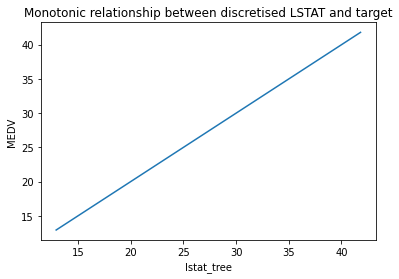

In [8]:
# monotonic relationship with target: train set

pd.concat([X_train, y_train], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

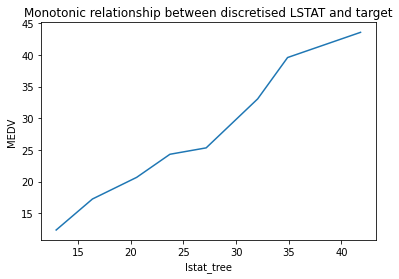

In [9]:
# monotonic relationship with target: test set

X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

pd.concat([X_test, y_test], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Nous pouvons observer la relation monotone entre les intervalles dérivés de l'arbre et la cible MEDV dans la sortie du bloc de code précédent

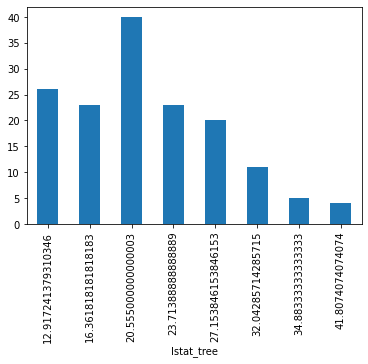

In [10]:
# plot number of observations per bin

X_test.groupby(['lstat_tree'])['LSTAT'].count().plot.bar()

Pour effectuer une discrétisation avec des arbres de décision, nous avons d'abord chargé l'ensemble de données et l'avons divisé en ensembles de train et de test à l'aide de la fonction scikit-learn train_test_split(). Ensuite, nous avons choisi une variable, LSTAT, et avons ajusté un arbre de décision pour la régression à l'aide de DecisionTreeRegressor() de scikit-learn. Nous avons utilisé to_frame() pour transformer la série pandas avec la variable en un cadre de données et rendre les données compatibles avec les prédicteurs scikit-learn. Nous avons utilisé la méthode fit() pour que l'arbre apprenne à prédire la cible MEDV à partir de LSTAT. Avec la méthode predict(), l'arbre a estimé la cible à partir de LSTAT dans les ensembles d'apprentissage et de test. L'arbre de décision a renvoyé huit valeurs distinctes, qui étaient ses prédictions. Ces sorties représentaient les cases de la variable discrétisée.

Pour visualiser la relation monotone entre les sorties de l'arbre et la cible, nous avons tracé des intervale prédites par l'arbre en fonction de la valeur cible moyenne pour chacune de ces cases. Nous avons d'abord concaténé l'ensemble de test et la cible à l'aide de la méthode concat() de pandas. Ensuite, nous avons utilisé la méthode groupby() de pandas pour regrouper les observations par intervale, puis nous avons calculé la moyenne de MEDV dans chaque intervale. Avec la méthode plot() des pandas, nous avons tracé la relation entre les bacs et MEDV